# Assess which audio features are relevant to classify effects

## 0. Loading data

In [4]:
import sys
import pathlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import soundfile as sf
sys.path.append('..')
import util
import features
import IPython.display as ipd
import random
import os
import tqdm

ModuleNotFoundError: No module named 'scipy'

In [2]:
DATA_PATH = pathlib.Path('/home/alexandre/AutoFX/data')
DRY_PATH = DATA_PATH / 'NoFX'
DISTO_PATH = DATA_PATH / 'distortion'
CHORUS_PATH = DATA_PATH / 'chorus'
REVERB_PATH = DATA_PATH / 'reverb'

Sound examples:

In [3]:
print("Dry:")
ipd.display(ipd.Audio(filename=DRY_PATH / random.choice(os.listdir(DRY_PATH))))
print("Distortion:")
ipd.display(ipd.Audio(filename=DISTO_PATH / random.choice(os.listdir(DISTO_PATH))))
print("Chorus:")
ipd.display(ipd.Audio(filename=CHORUS_PATH / random.choice(os.listdir(CHORUS_PATH))))
print("Reverb:")
ipd.display(ipd.Audio(filename=REVERB_PATH / random.choice(os.listdir(REVERB_PATH))))

Dry:


Distortion:


Chorus:


Reverb:


## 1. Comparing features
### 1.1. Spectral features
#### 1.1.1. Mean values

Lists initialisation

In [4]:
FFT_SIZE = 8192
HOP_SIZE = 512
Q_NORM = 2

In [5]:
cent_dry = []
cent_disto = []
cent_chorus = []
cent_reverb = []

In [6]:
spread_dry = []
spread_disto = []
spread_chorus = []
spread_reverb = []

In [7]:
skew_dry = []
skew_disto = []
skew_chorus = []
skew_reverb = []

In [8]:
kurt_dry = []
kurt_disto = []
kurt_chorus = []
kurt_reverb = []

In [9]:
flux_dry = []
flux_disto = []
flux_chorus = []
flux_reverb = []

In [10]:
rolloff_dry = []
rolloff_disto = []
rolloff_chorus = []
rolloff_reverb = []

In [11]:
slope_dry = []
slope_disto = []
slope_chorus = []
slope_reverb = []

In [12]:
flat_dry = []
flat_disto = []
flat_chorus = []
flat_reverb = []

Dry sounds

In [14]:
for file in tqdm.tqdm(os.listdir(DRY_PATH)):
    audio, rate = util.read_audio(DRY_PATH / file, add_noise = True)
    stft, freq = util.get_stft(audio, rate, FFT_SIZE, HOP_SIZE)
    mag = np.abs(stft)
    cent = features.spectral_centroid(mag=mag, freq=freq)
    cent_dry.append(np.mean(cent))
    spread = features.spectral_spread(mag=mag, freq=freq, cent=cent)
    spread_dry.append(np.mean(spread))
    skew = features.spectral_skewness(mag=mag, freq=freq, cent=cent)
    skew_dry.append(np.mean(skew))
    kurt = features.spectral_kurtosis(mag=mag, freq=freq, cent=cent)
    kurt_dry.append(np.mean(kurt))
    flux = features.spectral_flux(mag, Q_NORM)
    flux_dry.append(np.mean(flux))
    rolloff = features.spectral_rolloff(mag=mag, freq=freq)
    rolloff_dry.append(np.mean(rolloff))
    slope = features.spectral_slope(mag=mag, freq=freq)
    slope_dry.append(np.mean(slope))
    flat = features.spectral_flatness(mag=mag, rate=rate)
    flat_dry.append(np.mean(flat))

100%|█████████████████████████████████████████| 624/624 [01:11<00:00,  8.73it/s]


Distortion sounds

In [15]:
for file in tqdm.tqdm(os.listdir(DISTO_PATH)):
    audio, rate = util.read_audio(DISTO_PATH / file, add_noise = True)
    stft, freq = util.get_stft(audio, rate, FFT_SIZE, HOP_SIZE)
    mag = np.abs(stft)
    cent = features.spectral_centroid(mag=mag, freq=freq)
    cent_disto.append(np.mean(cent))
    spread = features.spectral_spread(mag=mag, freq=freq, cent=cent)
    spread_disto.append(np.mean(spread))
    skew = features.spectral_skewness(mag=mag, freq=freq, cent=cent)
    skew_disto.append(np.mean(skew))
    kurt = features.spectral_kurtosis(mag=mag, freq=freq, cent=cent)
    kurt_disto.append(np.mean(kurt))
    flux = features.spectral_flux(mag, Q_NORM)
    flux_disto.append(np.mean(flux))
    rolloff = features.spectral_rolloff(mag=mag, freq=freq)
    rolloff_disto.append(np.mean(rolloff))
    slope = features.spectral_slope(mag=mag, freq=freq)
    slope_disto.append(np.mean(slope))
    flat = features.spectral_flatness(mag=mag, rate=rate)
    flat_disto.append(np.mean(flat))

100%|█████████████████████████████████████████| 624/624 [01:11<00:00,  8.72it/s]


Chorus sounds

In [16]:
for file in tqdm.tqdm(os.listdir(CHORUS_PATH)):
    audio, rate = util.read_audio(CHORUS_PATH / file, add_noise = True)
    stft, freq = util.get_stft(audio, rate, FFT_SIZE, HOP_SIZE)
    mag = np.abs(stft)
    cent = features.spectral_centroid(mag=mag, freq=freq)
    cent_chorus.append(np.mean(cent))
    spread = features.spectral_spread(mag=mag, freq=freq, cent=cent)
    spread_chorus.append(np.mean(spread))
    skew = features.spectral_skewness(mag=mag, freq=freq, cent=cent)
    skew_chorus.append(np.mean(skew))
    kurt = features.spectral_kurtosis(mag=mag, freq=freq, cent=cent)
    kurt_chorus.append(np.mean(kurt))
    flux = features.spectral_flux(mag, Q_NORM)
    flux_chorus.append(np.mean(flux))
    rolloff = features.spectral_rolloff(mag=mag, freq=freq)
    rolloff_chorus.append(np.mean(rolloff))
    slope = features.spectral_slope(mag=mag, freq=freq)
    slope_chorus.append(np.mean(slope))
    flat = features.spectral_flatness(mag=mag, rate=rate)
    flat_chorus.append(np.mean(flat))

100%|█████████████████████████████████████████| 624/624 [01:11<00:00,  8.71it/s]


Reverb sounds

In [17]:
for file in tqdm.tqdm(os.listdir(REVERB_PATH)):
    audio, rate = util.read_audio(REVERB_PATH / file, add_noise = True)
    stft, freq = util.get_stft(audio, rate, FFT_SIZE, HOP_SIZE)
    mag = np.abs(stft)
    cent = features.spectral_centroid(mag=mag, freq=freq)
    cent_reverb.append(np.mean(cent))
    spread = features.spectral_spread(mag=mag, freq=freq, cent=cent)
    spread_reverb.append(np.mean(spread))
    skew = features.spectral_skewness(mag=mag, freq=freq, cent=cent)
    skew_reverb.append(np.mean(skew))
    kurt = features.spectral_kurtosis(mag=mag, freq=freq, cent=cent)
    kurt_reverb.append(np.mean(kurt))
    flux = features.spectral_flux(mag, Q_NORM)
    flux_reverb.append(np.mean(flux))
    rolloff = features.spectral_rolloff(mag=mag, freq=freq)
    rolloff_reverb.append(np.mean(rolloff))
    slope = features.spectral_slope(mag=mag, freq=freq)
    slope_reverb.append(np.mean(slope))
    flat = features.spectral_flatness(mag=mag, rate=rate)
    flat_reverb.append(np.mean(flat))

100%|█████████████████████████████████████████| 624/624 [01:13<00:00,  8.53it/s]


*Plots*

In [21]:
x = np.arange(len(cent_dry))

<IPython.core.display.Javascript object>


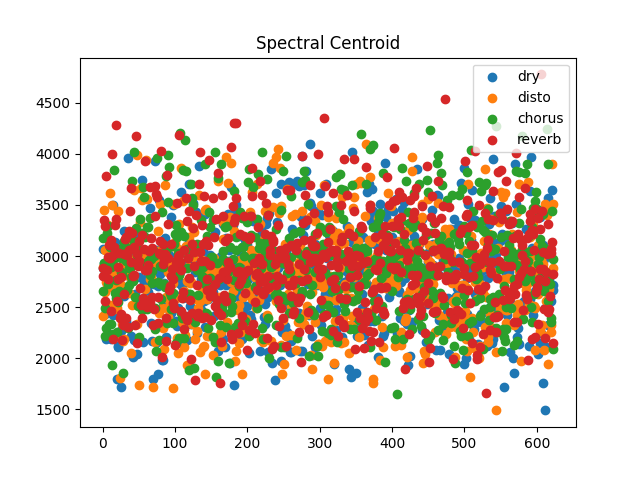

In [24]:
plt.figure(1)
plt.scatter(x, cent_dry, label='dry')
plt.scatter(x, cent_disto, label='disto')
plt.scatter(x, cent_chorus, label='chorus')
plt.scatter(x, cent_reverb, label='reverb')
plt.legend()
plt.title("Spectral Centroid")
plt.show()

<IPython.core.display.Javascript object>


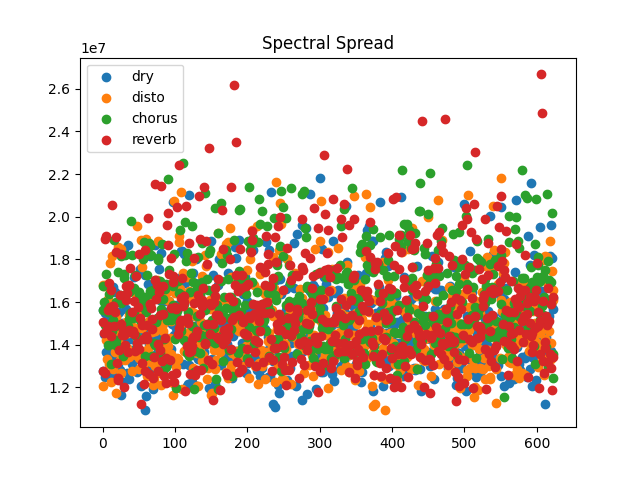

In [25]:
plt.figure(2)
plt.scatter(x, spread_dry, label='dry')
plt.scatter(x, spread_disto, label='disto')
plt.scatter(x, spread_chorus, label='chorus')
plt.scatter(x, spread_reverb, label='reverb')
plt.legend()
plt.title("Spectral Spread")
plt.show()

<IPython.core.display.Javascript object>


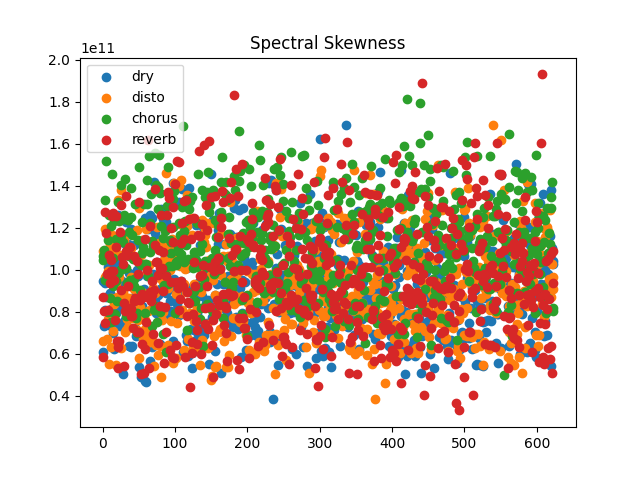

In [26]:
plt.figure(3)
plt.scatter(x, skew_dry, label='dry')
plt.scatter(x, skew_disto, label='disto')
plt.scatter(x, skew_chorus, label='chorus')
plt.scatter(x, skew_reverb, label='reverb')
plt.legend()
plt.title("Spectral Skewness")
plt.show()

<IPython.core.display.Javascript object>


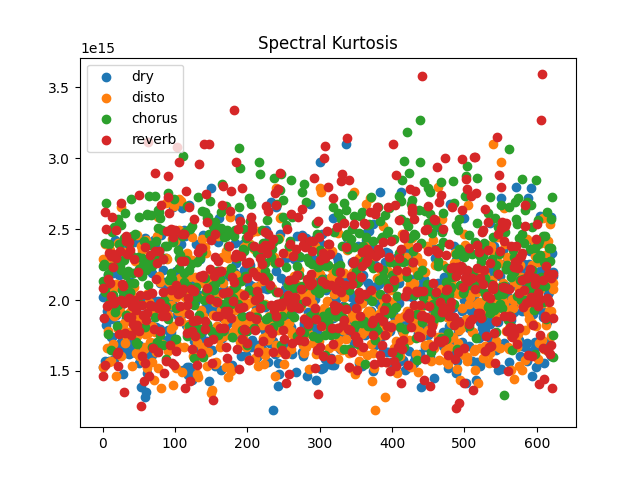

In [27]:
plt.figure(4)
plt.scatter(x, kurt_dry, label='dry')
plt.scatter(x, kurt_disto, label='disto')
plt.scatter(x, kurt_chorus, label='chorus')
plt.scatter(x, kurt_reverb, label='reverb')
plt.legend()
plt.title("Spectral Kurtosis")
plt.show()

<IPython.core.display.Javascript object>


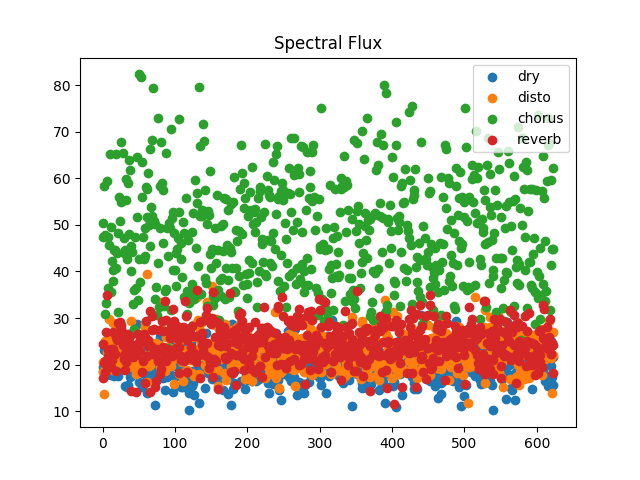

In [28]:
plt.figure(5)
plt.scatter(x, flux_dry, label='dry')
plt.scatter(x, flux_disto, label='disto')
plt.scatter(x, flux_chorus, label='chorus')
plt.scatter(x, flux_reverb, label='reverb')
plt.legend()
plt.title("Spectral Flux")
plt.show()

<IPython.core.display.Javascript object>


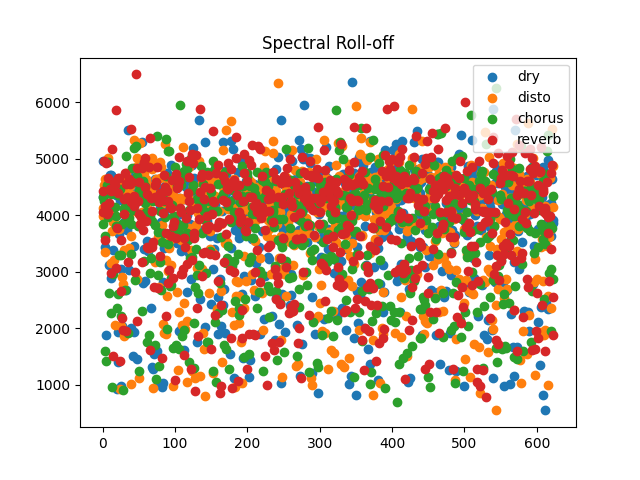

In [29]:
plt.figure(6)
plt.scatter(x, rolloff_dry, label='dry')
plt.scatter(x, rolloff_disto, label='disto')
plt.scatter(x, rolloff_chorus, label='chorus')
plt.scatter(x, rolloff_reverb, label='reverb')
plt.legend()
plt.title("Spectral Roll-off")
plt.show()

<IPython.core.display.Javascript object>


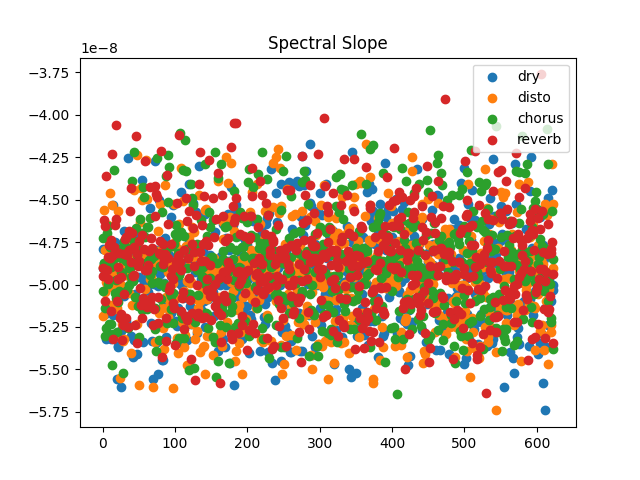

In [30]:
plt.figure(7)
plt.scatter(x, slope_dry, label='dry')
plt.scatter(x, slope_disto, label='disto')
plt.scatter(x, slope_chorus, label='chorus')
plt.scatter(x, slope_reverb, label='reverb')
plt.legend()
plt.title("Spectral Slope")
plt.show()

<IPython.core.display.Javascript object>


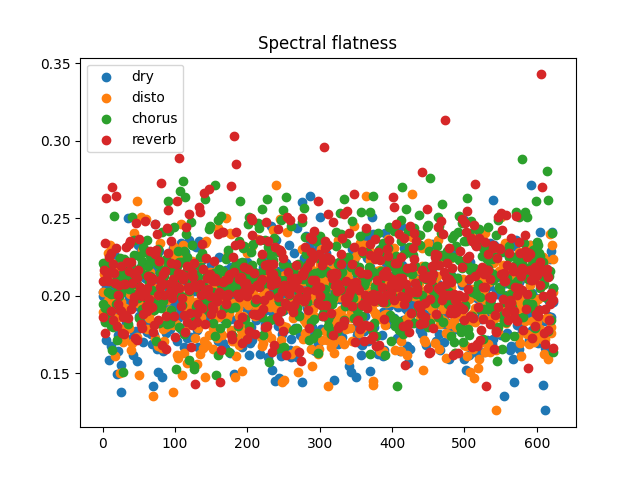

In [31]:
plt.figure(8)
plt.scatter(x, flat_dry, label='dry')
plt.scatter(x, flat_disto, label='disto')
plt.scatter(x, flat_chorus, label='chorus')
plt.scatter(x, flat_reverb, label='reverb')
plt.legend()
plt.title("Spectral flatness")
plt.show()